<a href="https://colab.research.google.com/github/solharsh/Capstone_Sentiment_Analysis/blob/master/NLP_Capstone_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import os
import numpy as np
import pandas as pd
import re
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('averaged_perceptron_tagger')
stopword = nltk.corpus.stopwords.words('english')
from nltk.corpus import stopwords
nltk.download('words')
from nltk.text import Text
import string, re
from sklearn.feature_extraction.text import CountVectorizer
string.punctuation
wn = nltk.WordNetLemmatizer()
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
#nlp = spacy.load('en')
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm_notebook as tqdm
from tqdm import trange
#analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [95]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [96]:
#path of the directory with data
path = r'/content/drive/My Drive/Capstone Project - NLP/NLP Assignment RAW/Text'
#Getting the list of files contained in the above path
files = os.listdir(path)
#printing the result to see the file names
files

['201203 PM.txt',
 '201407 AJ.txt',
 '201502 AJ.txt',
 '201902 PG Int.txt',
 '201907 NS.txt',
 '201702 AJ.txt',
 '201802 AJ.txt',
 '201002 PM.txt',
 '201602 AJ.txt',
 '201102 PM.txt',
 '201302 PC.txt',
 '201402 PC Int.txt']

These are the files that are present in the Text folder. Lets read all the data in these files and keep it in an object

### Creating a list containing all the speeches

In [0]:
all_speech_list = []
for f in files:
    file_full_path = os.path.join(path, f)
    with open(file_full_path, encoding="ISO-8859-1") as f:
        all_speech_list.append(f.read().strip())        

In [98]:
print('We have the data for {} files'.format(len(all_speech_list)))

We have the data for 12 files


In [99]:
#checking the data with one speech
all_speech_list[0]

'Budget 2012-2013 \n\nSpeech of \n\nPranab Mukherjee \n\nMinister of Finance \n\nMarch 16, 2012 \n\nMadam Speaker, \n\nI rise to present the Union Budget for 2012-13. \n\nFor the Indian economy, this was a year of recovery interrupted. When \none year ago, I rose to present the Budget, the challenges were many, but there \nwas a sense that the world economy was on the mend. The Budget was presented \nin the first glimmer of hope. But reality turned out to be different. The sovereign \ndebt crisis in the Euro zone intensified, political turmoil in Middle East injected \nwidespread uncertainty, crude oil prices rose, an earthquake struck Japan and \nthe overall gloom refused to lift. \n\n2. While I believe that there should be no room for complacency, nor any \nexcuse for what happens in one\x92s own country, we will be misled if we ignore \nthe ground realities of the world. The global crisis has affected us. India\x92s Gross \nDomestic Product (GDP) is estimated to grow by 6.9 per cent

### Getting names of Speakers for the respective speech

In [100]:
#Budget  2010-2011\n\n \n\nSpeech  of\n\nPranab Mukherjee\n\nMinister of Finance
pattern = r'Speech\s*of\s*(.*\s.*)\s*Minister'
found = re.findall(pattern, ' '.join(all_speech_list))
speakers = [w.replace('\n', '').strip() for w in found]
print('Names of speakers are as follows:')
print(*speakers,sep='\n') 
print("Total Speakers: ", len(speakers))

Names of speakers are as follows:
Pranab Mukherjee
Arun Jaitley
Arun Jaitley
Piyush Goyal
Nirmala Sitharaman
Arun Jaitley
Arun Jaitley
Pranab Mukherjee
Arun Jaitley
Pranab Mukherjee
P. Chidambaram
P. Chidambaram
Total Speakers:  12


### Getting respective speech's date

In [101]:
#Budget  2010-2011\n\n \n\nSpeech  of\n\nPranab Mukherjee\n\nMinister of Finance\n\n \n\nFebruary  26,  2010\n\n \n\nMadam
speech_dates = []
pattern = r'[A-Z]\w+\s*\d{1,2}\s*,\s*\d{4}'
for speech in all_speech_list:
    found = re.search(pattern, speech)
    if found: 
        speech_date = speech[found.start():found.end()].replace('\n','').strip()
        speech_dates.append(speech_date)
print('Respective Dates:')
print(*speech_dates, len(speech_dates), sep='\n')

Respective Dates:
March 16, 2012
July 10, 2014
February 28, 2015
February 1, 2019
July 5, 2019
February 1, 2017
February 1, 2018
February  26,  2010
February 29, 2016
February 28, 2011
February 28, 2013
February 17, 2014
12


### Creating Dataframe for Speaker Name, Speech Date and Speeches

In [102]:
df = pd.DataFrame({'Speaker_Name':speakers,'Date_Of_Speech':speech_dates,'Speech':all_speech_list})
df

,Speaker_Name,Date_Of_Speech,Speech
0,Pranab Mukherjee,"March 16, 2012",Budget 2012-2013 \n\nSpeech of \n\nPranab Mukh...
1,Arun Jaitley,"July 10, 2014",Budget 2014-2015 \n\nSpeech of \n\nArun Jaitle...
2,Arun Jaitley,"February 28, 2015",CONTENTS \n\nPART -A \n\nPage No. \nIntroducti...
3,Piyush Goyal,"February 1, 2019",Interim Budget 2019-2020 \n\n \n\nSpeech of \n...
4,Nirmala Sitharaman,"July 5, 2019",Budget \n2019-2020 \n\n\nSpeech \nof \nNirmala...
5,Arun Jaitley,"February 1, 2017",CONTENTS \n\n \n\nPART - A \n\n Page No. \n\n ...
6,Arun Jaitley,"February 1, 2018",Budget 2018-2019 \n\n \n\nSpeech of \n\nArun J...
7,Pranab Mukherjee,"February 26, 2010",Budget 2010-2011\n\n \n\nSpeech of\n\nPranab...
8,Arun Jaitley,"February 29, 2016",CONTENTS \n\nPART -A \n\nPage No. \n\nIntroduc...
9,Pranab Mukherjee,"February 28, 2011",Budget 2011-2012 \n\nSpeech of \n\nPranab Mukh...


In [0]:
df['parsed'] = df.Speech.apply(nlp)

In [104]:
print("Document Count")
print(df.groupby('Speaker_Name')['Speech'].count())
print("Word Count")
df.groupby('Speaker_Name').apply(lambda x: x.Speech.apply(lambda x: len(x.split())).sum())

Document Count
Speaker_Name
Arun Jaitley          5
Nirmala Sitharaman    1
P. Chidambaram        2
Piyush Goyal          1
Pranab Mukherjee      3
Name: Speech, dtype: int64
Word Count


Speaker_Name
Arun Jaitley          96157
Nirmala Sitharaman    19518
P. Chidambaram        19411
Piyush Goyal           8155
Pranab Mukherjee      40806
dtype: int64

In [105]:
#shape of dataset
print("Input data has {} rows and {} columns".format(len(df), len(df.columns)))

Input data has 12 rows and 4 columns


There are many negation words like haven't, shouldn't, isn't and so on which we need for further sentiment analysis.
Decontrating those to make sure we have "not" word for further usage.

In [0]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
df['Speech'] = df['Speech'].apply(lambda x: decontracted(x))

In [0]:
def stance_features_extraction(df):
    df['word_count'] = df['Speech'].apply(lambda x: len((re.sub(' +',' ',re.sub(r'[^a-zA-Z0-9 ]', '', x))).strip().split(' ')))
    df['negation'] = df['Speech'].apply(lambda x: any(n in x for n in ['no', 'not', "n\'t"]))
    df['length'] = df['Speech'].apply(len)
    df['has_url'] = df['Speech'].apply(lambda x: bool(re.search('http(s)?://', x)))
    df['quest_mark'] = df['Speech'].apply(lambda x: x.count('?'))
    df['excl_mark'] = df['Speech'].apply(lambda x: x.count('!'))

    df['speech_polarity'] =  df['Speech'].apply(lambda x: TextBlob(x).sentiment.polarity)
    df['speech_subjectivity'] =  df['Speech'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    sid = SentimentIntensityAnalyzer()
    df = df.join(df['Speech'].apply(lambda x: sid.polarity_scores(x)).apply(pd.Series))

    return df

In [108]:
df = stance_features_extraction(df)
df

,Speaker_Name,Date_Of_Speech,Speech,parsed,word_count,negation,length,has_url,quest_mark,excl_mark,speech_polarity,speech_subjectivity,neg,neu,pos,compound
0,Pranab Mukherjee,"March 16, 2012",Budget 2012-2013 \n\nSpeech of \n\nPranab Mukh...,"(Budget, 2012, -, 2013, \n\n, Speech, of, \n\n...",14077,True,89122,True,0,0,0.071815,0.362030,0.035,0.844,0.121,1.0000
1,Arun Jaitley,"July 10, 2014",Budget 2014-2015 \n\nSpeech of \n\nArun Jaitle...,"(Budget, 2014, -, 2015, \n\n, Speech, of, \n\n...",16395,True,103238,False,3,0,0.076639,0.371572,0.036,0.831,0.133,1.0000
2,Arun Jaitley,"February 28, 2015",CONTENTS \n\nPART -A \n\nPage No. \nIntroducti...,"(CONTENTS, \n\n, PART, -A, \n\n, Page, No, ., ...",17885,True,112015,False,2,1,0.062384,0.376511,0.038,0.841,0.121,1.0000
3,Piyush Goyal,"February 1, 2019",Interim Budget 2019-2020 \n\n \n\nSpeech of \n...,"(Interim, Budget, 2019, -, 2020, \n\n \n\n, Sp...",8049,True,51083,False,0,0,0.079131,0.396252,0.030,0.830,0.140,1.0000
4,Nirmala Sitharaman,"July 5, 2019",Budget \n2019-2020 \n\n\nSpeech \nof \nNirmala...,"(Budget, \n, 2019, -, 2020, \n\n\n, Speech, \n...",19331,True,147406,False,1,1,0.071661,0.397372,0.032,0.843,0.124,1.0000
5,Arun Jaitley,"February 1, 2017",CONTENTS \n\n \n\nPART - A \n\n Page No. \n\n ...,"(CONTENTS, \n\n \n\n, PART, -, A, \n\n , Page,...",18644,True,120098,False,1,0,0.079742,0.381449,0.025,0.889,0.086,1.0000
6,Arun Jaitley,"February 1, 2018",Budget 2018-2019 \n\n \n\nSpeech of \n\nArun J...,"(Budget, 2018, -, 2019, \n\n \n\n, Speech, of,...",17922,True,118839,False,0,0,0.078149,0.405100,0.026,0.845,0.129,1.0000
7,Pranab Mukherjee,"February 26, 2010",Budget 2010-2011\n\n \n\nSpeech of\n\nPranab...,"(Budget, , 2010, -, 2011, \n\n \n\n, Speech, ...",12347,True,79393,True,2,0,0.090767,0.364925,0.025,0.845,0.130,1.0000
8,Arun Jaitley,"February 29, 2016",CONTENTS \n\nPART -A \n\nPage No. \n\nIntroduc...,"(CONTENTS, \n\n, PART, -A, \n\n, Page, No, ., ...",24552,True,156693,False,1,0,0.040264,0.380412,0.038,0.851,0.111,1.0000
9,Pranab Mukherjee,"February 28, 2011",Budget 2011-2012 \n\nSpeech of \n\nPranab Mukh...,"(Budget, 2011, -, 2012, \n\n, Speech, of, \n\n...",13917,True,87793,True,0,1,0.089208,0.373963,0.029,0.851,0.120,1.0000


### Insights

- Arun Jaitley has a lot to say in February 29, 2016 (longest speech of 24551 words)
- On the other hand P. Chidambaram ran short of words on February 17, 2014 (shortest speech of 6564 words)
- URL was found in first three speeches of Pranab Mukherjee which we will be removing in upcoming cleaning steps.
- Not many question marks are there and therefore, we do not need to emphasize much on the sentiment associated with those questions and we can simply remove the punctuation. 
- The same goes for exclamation mark. 

I am intrigued by the length of speeches by Nirmala Sitharaman and Arun Jaitley. Let's check it manually.

#### Exploratory Data Analysis

In [111]:
NS_Speech = df['Speech'][11]
NS_Speech

'Interim Budget 2014-2015 \n\nSpeech of \n\nP. Chidambaram \n\nMinister of Finance \n\nFebruary 17, 2014 \n\nMadam Speaker, \nINTRODUCTION \nI rise to present the Interim Budget for 2014-15. \n\nThe Current Economic Situation \n\n2. As I prepared to write this speech, I found that whether it is a regular Budget for the \nfull year or an interim Budget, some things remain the same. For example, our goals are the \nsame and the global context is the same. As I said last year, we are not unaffected by what \nhappens in the rest of the world. Since September 2008, the state of the world economy has \nbeen the most decisive factor impacting the fortunes of every developing country. Hence, it is \npertinent to say a few words on the global economy as well as on the global risks. \n3. World economic growth was 3.9 percent in 2011, 3.1 percent in 2012 and 3.0 percent \nin 2013. Those numbers tell the story. Among India\x92s major trading partners, who are also \nthe major sources of our foreig

In [112]:
df['Speech'][7]

'Budget  2010-2011\n\n \n\nSpeech  of\n\nPranab Mukherjee\n\nMinister of Finance\n\n \n\nFebruary  26,  2010\n\n \n\nMadam Speaker,\n\n            I rise to present the Union Budget for 2010-11.\n\n            In 2009, when I presented the interim Budget in February and the regular Budget in July in this august House, the Indian economy was facing grave uncertainties. Growth had started decelerating and the business sentiment was weak. The economy is capacity to sustain high growth was under serious threat from the widespread economic slowdown in the developed world.\n\n2.          It was not clear to us, as also to the policy makers in many other countries, how this crisis would eventually unfold. What would be its impact on the growth momentum of the Indian economy?  How soon will we be able to turnaround the fortunes of our economy? The short term global outlook was bleak and the consensus was that year 2009 would face the brunt of this crisis across the world.\n\n3.          At hom

This made me observe that the format of 11th Speech is as follows: 
    
- The
- recent 
- election 
- which 
- brought 
- us 
- to 
- this 
- august 
- House 
- today, 

i.e every word is written in next line instead of continuous sentences

In [0]:
#Let's correct the format and making it similar to all other speeches. 

import re
NS_Speech = NS_Speech.replace('\n','')
NS_Speech
df['Speech'][11] = NS_Speech

In [0]:
from bs4 import BeautifulSoup 
import re # For regular expressions
# Stopwords can be useful to undersand the semantics of the sentence.
# Therefore stopwords are not removed while creating the word2vec model.
# But they will be removed  while averaging feature vectors.
from nltk.corpus import stopwords

The speech contains few continuos sentences without any space in between. For example: 
exportedintheprecedingfinancialyearVReductionincustomsdutyforDefencesector57AnyChapterSpecifiedMilitaryequipmentandtheirpartsimportedbyMinistryofDefenceorArmedforcesApplicablerateNilVIAdditionalrevenuemeasures587106Silver

This cannot be fixed due to lack of pattern.

In [114]:
import re
def capital_words_spaces(str1):
  return re.sub(r"(\w)([A-Z])", r"\1 \2", str1)

print(capital_words_spaces(df.Speech[11]))
#print(capital_words_spaces("PythonExercises"))
#print(capital_words_spaces("PythonExercisesPracticeSolution"))

Interim Budget 2014-2015 Speech of P. Chidambaram Minister of Finance February 17, 2014 Madam Speaker, I NT RO DU CT IO N I rise to present the Interim Budget for 2014-15. The Current Economic Situation 2. As I prepared to write this speech, I found that whether it is a regular Budget for the full year or an interim Budget, some things remain the same. For example, our goals are the same and the global context is the same. As I said last year, we are not unaffected by what happens in the rest of the world. Since September 2008, the state of the world economy has been the most decisive factor impacting the fortunes of every developing country. Hence, it is pertinent to say a few words on the global economy as well as on the global risks. 3. World economic growth was 3.9 percent in 2011, 3.1 percent in 2012 and 3.0 percent in 2013. Those numbers tell the story. Among Indias major trading partners, who are also the major sources of our foreign capital inflows, the United States has just 

In [115]:
#Max length of speech
df['length'].max()

156693

In [116]:
# Minimum length of speech
df['length'].min()

40698

In [117]:
#Maximum word count in a speech
df['word_count'].max()

24552

In [118]:
# Minimum word count
df['word_count'].min()

6564

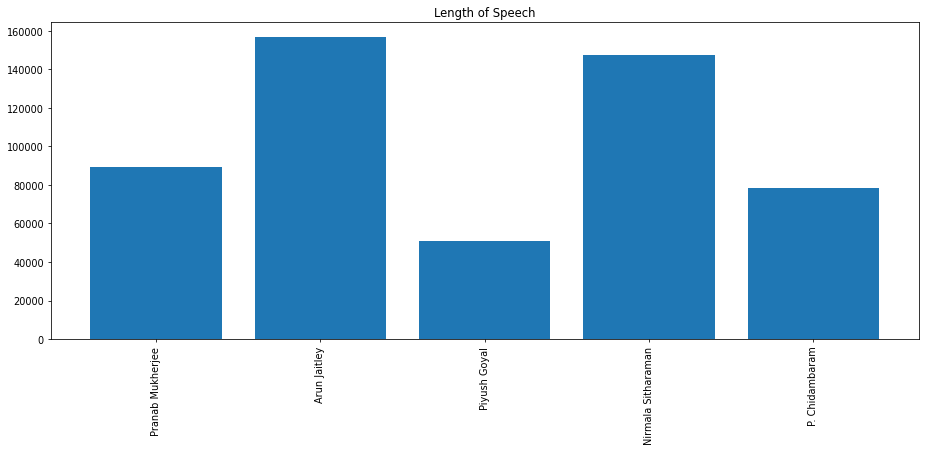

In [122]:
#df["length"].plot.bar()
#plt.show()
x = speakers
y = df["length"]
plt.figure(figsize=(16, 6),dpi=70)
plt.xticks(rotation=90)
plt.title('Length of Speech')
plt.bar(x,y)
plt.show()

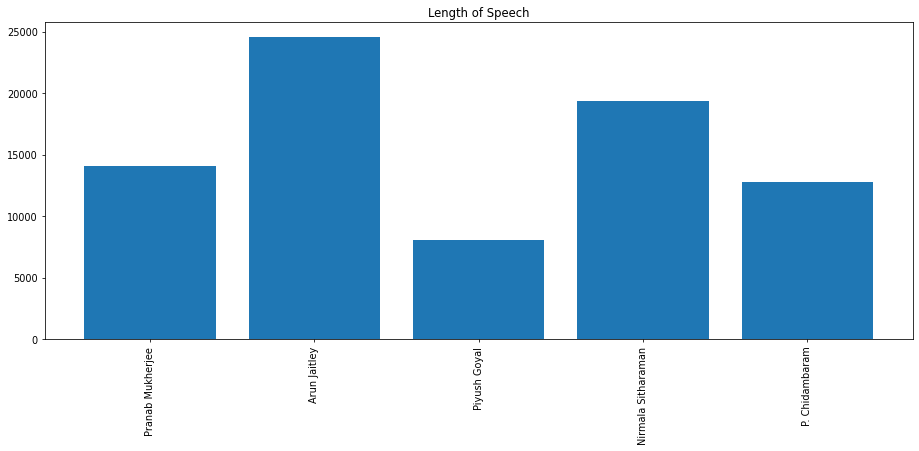

In [123]:
x = speakers
y = df["word_count"]
plt.figure(figsize=(16, 6),dpi=70)
plt.xticks(rotation=90)
plt.title('Length of Speech')
plt.bar(x,y)
plt.show()

### Cleaning text and StopWords removal

In [0]:
# Importing the necessary functions
import nltk, re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
words = set(nltk.corpus.words.words())

# Initialize the lemmatizer
wl = WordNetLemmatizer()

# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Let's get a list of stop words from the NLTK library
stop = stopwords.words('english')

# These words are important for our problem. We don't want to remove them.
excluding = ['against', 'not', 'don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't",
             'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 
             'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't",
             'needn', "needn't",'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', 
             "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# New stop word list
stop_words = [word for word in stop if word not in excluding]

snow = SnowballStemmer('english')

def process_text(texts): 
    final_text_list=[]
    for sent in texts:
        filtered_sentence=[]
        
        sent = sent.lower() # Lowercase 
        sent = sent.strip() # Remove leading/trailing whitespace
        sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
        sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:
        sent = re.sub(r"\b[A-Z]{2,}\b", "", sent) #removing accronyms
        sent = re.sub(r"\d+","",sent) #removing numbers
        sent = re.sub(r'http\S+', '', sent) #remove URLs

        # Tokenize the sentence
        for w in word_tokenize(sent):
            # We are applying some custom filtering here, feel free to try different things
            # Check if it is not numeric and its length>2 and not in stop words
            if(not w.isnumeric()) and (len(w)>2) and (w not in stop_words) and (w not in string.punctuation) and (w in words or not w.isalpha()):  
                # Stem and add to filtered list
                filtered_sentence.append(wl.lemmatize(w))
        final_string = " ".join(filtered_sentence) #final string of cleaned words
 
        final_text_list.append(final_string)
    
    return final_text_list

In [140]:
print("Pre-processing the Speech field with use of Lemmatization")
df["Speech_Lemma"] = process_text(df["Speech"].tolist()) 

Pre-processing the Speech field with use of Lemmatization


In [141]:
df["Speech_Lemma"]

0     budget speech minist financ march madam speake...
1     budget speech minist financ madam speaker rise...
2     content part page introduct major ahead fiscal...
3     interim budget speech minist financ madam spea...
4     budget speech minist financ mr. speaker sir ri...
5     content part page introduct rural popul youth ...
6     budget speech minist financ section govern eco...
7     budget speech minist financ madam speaker rise...
8     content part page introduct agricultur welfar ...
9     budget speech minist financ madam speaker rise...
10    budget speech minist financ madam speaker rise...
11    interim budget speech minist financ madam spea...
Name: Speech_Lemma, dtype: object

In [134]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
import nltk.data
#nltk.download('popular')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [0]:
# This function splits a speech into sentences
def speech_sentences(speech, tokenizer, remove_stopwords=False):
    # 1. Using nltk tokenizer
    raw_sentences = tokenizer.tokenize(speech.strip())
    sentences = []
    # 2. Loop for each sentence
    for raw_sentence in raw_sentences:
        if len(raw_sentence)>0:
            sentences.append(speech_wordlist(raw_sentence,\
                                            remove_stopwords))

    # This returns the list of lists
    return sentences

In [145]:
words = []
print("Parsing sentences from training set")
for speech in df["Speech_Lemma"]:
    words += speech_sentences(speech, tokenizer)

Parsing sentences from training set


In [146]:
sentences

[['budget',
  'speech',
  'minist',
  'financ',
  'march',
  'madam',
  'speaker',
  'rise',
  'present',
  'union',
  'budget',
  'economi',
  'year',
  'recoveri',
  'interrupt',
  'one',
  'year',
  'ago',
  'rose',
  'present',
  'budget',
  'mani',
  'sens',
  'world',
  'economi',
  'mend',
  'budget',
  'first',
  'glimmer',
  'hope',
  'realiti',
  'turn',
  'differ',
  'sovereign',
  'debt',
  'crisi',
  'zone',
  'polit',
  'turmoil',
  'middl',
  'east',
  'widespread',
  'uncertainti',
  'crude',
  'oil',
  'rose',
  'earthquak',
  'struck',
  'japan',
  'overal',
  'gloom',
  'lift',
  'believ',
  'room',
  'complac',
  'excus',
  'one',
  'countri',
  'misl',
  'ignor',
  'ground',
  'world',
  'global',
  'crisi',
  'affect',
  'india',
  'gross',
  'domest',
  'product',
  'grow',
  'per',
  'cent',
  'grown',
  'rate',
  'per',
  'cent',
  'two',
  'preced',
  'though',
  'abl',
  'limit',
  'advers',
  'impact',
  'slowdown',
  'economi',
  'year',
  'perform',
  'dis

In [0]:
# Importing the built-in logging module
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [150]:
#Removing the columns that are not required anymore
df = df.drop(['negation','has_url','quest_mark','excl_mark','compound'],axis=1)
df

,Speaker_Name,Date_Of_Speech,Speech,parsed,word_count,length,speech_polarity,speech_subjectivity,neg,neu,pos,Speech_Lemma
0,Pranab Mukherjee,"March 16, 2012",Budget 2012-2013 \n\nSpeech of \n\nPranab Mukh...,"(Budget, 2012, -, 2013, \n\n, Speech, of, \n\n...",14077,89122,0.071815,0.362030,0.035,0.844,0.121,budget speech minist financ march madam speake...
1,Arun Jaitley,"July 10, 2014",Budget 2014-2015 \n\nSpeech of \n\nArun Jaitle...,"(Budget, 2014, -, 2015, \n\n, Speech, of, \n\n...",16395,103238,0.076639,0.371572,0.036,0.831,0.133,budget speech minist financ madam speaker rise...
2,Arun Jaitley,"February 28, 2015",CONTENTS \n\nPART -A \n\nPage No. \nIntroducti...,"(CONTENTS, \n\n, PART, -A, \n\n, Page, No, ., ...",17885,112015,0.062384,0.376511,0.038,0.841,0.121,content part page introduct major ahead fiscal...
3,Piyush Goyal,"February 1, 2019",Interim Budget 2019-2020 \n\n \n\nSpeech of \n...,"(Interim, Budget, 2019, -, 2020, \n\n \n\n, Sp...",8049,51083,0.079131,0.396252,0.030,0.830,0.140,interim budget speech minist financ madam spea...
4,Nirmala Sitharaman,"July 5, 2019",Budget \n2019-2020 \n\n\nSpeech \nof \nNirmala...,"(Budget, \n, 2019, -, 2020, \n\n\n, Speech, \n...",19331,147406,0.071661,0.397372,0.032,0.843,0.124,budget speech minist financ mr. speaker sir ri...
5,Arun Jaitley,"February 1, 2017",CONTENTS \n\n \n\nPART - A \n\n Page No. \n\n ...,"(CONTENTS, \n\n \n\n, PART, -, A, \n\n , Page,...",18644,120098,0.079742,0.381449,0.025,0.889,0.086,content part page introduct rural popul youth ...
6,Arun Jaitley,"February 1, 2018",Budget 2018-2019 \n\n \n\nSpeech of \n\nArun J...,"(Budget, 2018, -, 2019, \n\n \n\n, Speech, of,...",17922,118839,0.078149,0.405100,0.026,0.845,0.129,budget speech minist financ section govern eco...
7,Pranab Mukherjee,"February 26, 2010",Budget 2010-2011\n\n \n\nSpeech of\n\nPranab...,"(Budget, , 2010, -, 2011, \n\n \n\n, Speech, ...",12347,79393,0.090767,0.364925,0.025,0.845,0.130,budget speech minist financ madam speaker rise...
8,Arun Jaitley,"February 29, 2016",CONTENTS \n\nPART -A \n\nPage No. \n\nIntroduc...,"(CONTENTS, \n\n, PART, -A, \n\n, Page, No, ., ...",24552,156693,0.040264,0.380412,0.038,0.851,0.111,content part page introduct agricultur welfar ...
9,Pranab Mukherjee,"February 28, 2011",Budget 2011-2012 \n\nSpeech of \n\nPranab Mukh...,"(Budget, 2011, -, 2012, \n\n, Speech, of, \n\n...",13917,87793,0.089208,0.373963,0.029,0.851,0.120,budget speech minist financ madam speaker rise...


In [152]:
df['word_count_lemma'] = df['Speech_Lemma'].apply(lambda x: len((re.sub(' +',' ',re.sub(r'[^a-zA-Z0-9 ]', '', x))).strip().split(' ')))
df['negation_lemma'] = df['Speech_Lemma'].apply(lambda x: any(n in x for n in [' no ', ' not ', 'n\'t ']))
df['length_lemma'] = df['Speech_Lemma'].apply(len)
df['has_url_lemma'] = df['Speech_Lemma'].apply(lambda x: bool(re.search('http(s)?://', x)))
df['quest_mark_lemma'] = df['Speech_Lemma'].apply(lambda x: x.count('?'))
df['excl_mark_lemma'] = df['Speech_Lemma'].apply(lambda x: x.count('!'))
df.head()

,Speaker_Name,Date_Of_Speech,Speech,parsed,word_count,length,speech_polarity,speech_subjectivity,neg,neu,pos,Speech_Lemma,word_count_lemma,negation_lemma,length_lemma,has_url_lemma,quest_mark_lemma,excl_mark_lemma
0,Pranab Mukherjee,"March 16, 2012",Budget 2012-2013 \n\nSpeech of \n\nPranab Mukh...,"(Budget, 2012, -, 2013, \n\n, Speech, of, \n\n...",14077,89122,0.071815,0.362030,0.035,0.844,0.121,budget speech minist financ march madam speake...,5884,True,38856,False,0,0
1,Arun Jaitley,"July 10, 2014",Budget 2014-2015 \n\nSpeech of \n\nArun Jaitle...,"(Budget, 2014, -, 2015, \n\n, Speech, of, \n\n...",16395,103238,0.076639,0.371572,0.036,0.831,0.133,budget speech minist financ madam speaker rise...,6894,True,46529,False,0,0
2,Arun Jaitley,"February 28, 2015",CONTENTS \n\nPART -A \n\nPage No. \nIntroducti...,"(CONTENTS, \n\n, PART, -A, \n\n, Page, No, ., ...",17885,112015,0.062384,0.376511,0.038,0.841,0.121,content part page introduct major ahead fiscal...,7248,True,48621,False,0,0
3,Piyush Goyal,"February 1, 2019",Interim Budget 2019-2020 \n\n \n\nSpeech of \n...,"(Interim, Budget, 2019, -, 2020, \n\n \n\n, Sp...",8049,51083,0.079131,0.396252,0.030,0.830,0.140,interim budget speech minist financ madam spea...,3226,True,21392,False,0,0
4,Nirmala Sitharaman,"July 5, 2019",Budget \n2019-2020 \n\n\nSpeech \nof \nNirmala...,"(Budget, \n, 2019, -, 2020, \n\n\n, Speech, \n...",19331,147406,0.071661,0.397372,0.032,0.843,0.124,budget speech minist financ mr. speaker sir ri...,7973,True,55779,False,0,0


We can see that after cleaning, there are no URLs, question mark or exclamation mark and there is significant reduction in Word count and length too.

In [153]:
#Removing unnecessary columns
df = df.drop(['negation_lemma','has_url_lemma','quest_mark_lemma','excl_mark_lemma'],axis=1)
df.head(2)

,Speaker_Name,Date_Of_Speech,Speech,parsed,word_count,length,speech_polarity,speech_subjectivity,neg,neu,pos,Speech_Lemma,word_count_lemma,length_lemma
0,Pranab Mukherjee,"March 16, 2012",Budget 2012-2013 \n\nSpeech of \n\nPranab Mukh...,"(Budget, 2012, -, 2013, \n\n, Speech, of, \n\n...",14077,89122,0.071815,0.362030,0.035,0.844,0.121,budget speech minist financ march madam speake...,5884,38856
1,Arun Jaitley,"July 10, 2014",Budget 2014-2015 \n\nSpeech of \n\nArun Jaitle...,"(Budget, 2014, -, 2015, \n\n, Speech, of, \n\n...",16395,103238,0.076639,0.371572,0.036,0.831,0.133,budget speech minist financ madam speaker rise...,6894,46529


In [154]:
#Let's see the reduction in lenght and word count
df['reduction_wc'] = df['word_count_lemma'] - df['word_count']
df['reduction_len'] = df['length_lemma'] - df['length']
#Let's see the average word count and length of speeches
print("Average word count of speeches:")
print(df['reduction_wc'].mean())
print("Average length of speeches:")
print(df['reduction_len'].mean())
df.head(2)

2020-05-11 10:15:37,403 : INFO : NumExpr defaulting to 2 threads.


Average word count of speeches:
-9029.583333333334
Average length of speeches:
-57106.0


,Speaker_Name,Date_Of_Speech,Speech,parsed,word_count,length,speech_polarity,speech_subjectivity,neg,neu,pos,Speech_Lemma,word_count_lemma,length_lemma,reduction_wc,reduction_len
0,Pranab Mukherjee,"March 16, 2012",Budget 2012-2013 \n\nSpeech of \n\nPranab Mukh...,"(Budget, 2012, -, 2013, \n\n, Speech, of, \n\n...",14077,89122,0.071815,0.362030,0.035,0.844,0.121,budget speech minist financ march madam speake...,5884,38856,-8193,-50266
1,Arun Jaitley,"July 10, 2014",Budget 2014-2015 \n\nSpeech of \n\nArun Jaitle...,"(Budget, 2014, -, 2015, \n\n, Speech, of, \n\n...",16395,103238,0.076639,0.371572,0.036,0.831,0.133,budget speech minist financ madam speaker rise...,6894,46529,-9501,-56709


In [164]:
# Creating the model and setting values for the various parameters
num_features = 1000  # Word vector dimensionality
min_word_count = 100 # Minimum word count
num_workers = 4     # Number of parallel threads
context = 10        # Context window size
downsampling = 1e-3 # (0.001) Downsample setting for frequent words

# Initializing the train model
from gensim.models import word2vec
print("Training model....")
model = word2vec.Word2Vec(words,\
                          workers=num_workers,\
                          size=num_features,\
                          min_count=min_word_count,\
                          window=context,
                          sample=downsampling)

# To make the model memory efficient
model.init_sims(replace=True)

# Saving the model for later use. Can be loaded using Word2Vec.load()
model_name = "300features_40minwords_10context"
model.save(model_name)

2020-05-11 10:17:47,624 : INFO : collecting all words and their counts
2020-05-11 10:17:47,625 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-11 10:17:47,642 : INFO : collected 4837 word types from a corpus of 75814 raw words and 88 sentences
2020-05-11 10:17:47,643 : INFO : Loading a fresh vocabulary
2020-05-11 10:17:47,648 : INFO : effective_min_count=100 retains 149 unique words (3% of original 4837, drops 4688)
2020-05-11 10:17:47,648 : INFO : effective_min_count=100 leaves 32727 word corpus (43% of original 75814, drops 43087)
2020-05-11 10:17:47,651 : INFO : deleting the raw counts dictionary of 4837 items
2020-05-11 10:17:47,652 : INFO : sample=0.001 downsamples 149 most-common words
2020-05-11 10:17:47,652 : INFO : downsampling leaves estimated 16925 word corpus (51.7% of prior 32727)
2020-05-11 10:17:47,654 : INFO : estimated required memory for 149 words and 1000 dimensions: 1266500 bytes
2020-05-11 10:17:47,654 : INFO : resetting layer wei

Training model....


2020-05-11 10:17:47,890 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-05-11 10:17:47,892 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-11 10:17:47,893 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-11 10:17:47,904 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-11 10:17:47,905 : INFO : EPOCH - 2 : training on 75814 raw words (16883 effective words) took 0.1s, 172126 effective words/s
2020-05-11 10:17:47,988 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-05-11 10:17:47,995 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-05-11 10:17:48,009 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-05-11 10:17:48,012 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-05-11 10:17:48,013 : INFO : EPOCH - 3 : training on 75814 raw words (16929 effective words) took 0.1s, 166285 effective words/s
2020-0

In [165]:
# This will print the most similar words present in the model
model.wv.most_similar("tax")

[('income', 0.9873055219650269),
 ('act', 0.9819361567497253),
 ('amend', 0.9783139824867249),
 ('section', 0.9740729928016663),
 ('case', 0.9721283912658691),
 ('deduct', 0.972084105014801),
 ('shall', 0.9698610305786133),
 ('incom', 0.9695949554443359),
 ('respect', 0.9608885049819946),
 ('not', 0.9523118138313293)]

In [166]:
model.wv.most_similar("respect")

[('not', 0.9984186887741089),
 ('case', 0.9983258247375488),
 ('amend', 0.9960333108901978),
 ('avail', 0.9934384822845459),
 ('non', 0.9914055466651917),
 ('present', 0.9896060824394226),
 ('addit', 0.9875922203063965),
 ('shall', 0.9871340990066528),
 ('limit', 0.9869864583015442),
 ('base', 0.9856202006340027)]

In [167]:
# This will give the total number of words in the vocabolary created from this dataset
model.wv.syn0.shape

(149, 1000)

In [0]:
# Function to average all word vectors in a paragraph
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index2word)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [0]:
# Function for calculating the average feature vector
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        # Printing a status message every 1000th review
        if counter%1000 == 0:
            print("Review %d of %d"%(counter,len(reviews)))
            
        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs

In [173]:
# Calculating average feature vector for training set
clean_train_reviews = []
for speech in df['Speech_Lemma'][0]:
    clean_train_reviews.append(review_wordlist(speech, remove_stopwords=True))
    
trainDataVecs = getAvgFeatureVecs(clean_train_reviews, model, num_features)

Review 0 of 38856
Review 1000 of 38856
Review 2000 of 38856
Review 3000 of 38856
Review 4000 of 38856
Review 5000 of 38856
Review 6000 of 38856
Review 7000 of 38856
Review 8000 of 38856
Review 9000 of 38856
Review 10000 of 38856
Review 11000 of 38856
Review 12000 of 38856
Review 13000 of 38856
Review 14000 of 38856
Review 15000 of 38856
Review 16000 of 38856
Review 17000 of 38856
Review 18000 of 38856
Review 19000 of 38856
Review 20000 of 38856
Review 21000 of 38856
Review 22000 of 38856
Review 23000 of 38856
Review 24000 of 38856
Review 25000 of 38856
Review 26000 of 38856
Review 27000 of 38856
Review 28000 of 38856
Review 29000 of 38856
Review 30000 of 38856
Review 31000 of 38856
Review 32000 of 38856
Review 33000 of 38856
Review 34000 of 38856
Review 35000 of 38856
Review 36000 of 38856
Review 37000 of 38856
Review 38000 of 38856


In [174]:
# Calculating average feature vactors for test set     
clean_test_reviews = []
for review in df["Speech_Lemma"][0]:
    clean_test_reviews.append(review_wordlist(speech,remove_stopwords=True))
    
testDataVecs = getAvgFeatureVecs(clean_test_reviews, model, num_features)

Review 0 of 38856
Review 1000 of 38856
Review 2000 of 38856
Review 3000 of 38856
Review 4000 of 38856
Review 5000 of 38856
Review 6000 of 38856
Review 7000 of 38856
Review 8000 of 38856
Review 9000 of 38856
Review 10000 of 38856
Review 11000 of 38856
Review 12000 of 38856
Review 13000 of 38856
Review 14000 of 38856
Review 15000 of 38856
Review 16000 of 38856
Review 17000 of 38856
Review 18000 of 38856
Review 19000 of 38856
Review 20000 of 38856
Review 21000 of 38856
Review 22000 of 38856
Review 23000 of 38856
Review 24000 of 38856
Review 25000 of 38856
Review 26000 of 38856
Review 27000 of 38856
Review 28000 of 38856
Review 29000 of 38856
Review 30000 of 38856
Review 31000 of 38856
Review 32000 of 38856
Review 33000 of 38856
Review 34000 of 38856
Review 35000 of 38856
Review 36000 of 38856
Review 37000 of 38856
Review 38000 of 38856


In [0]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 999
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import nltk
import re
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics  import accuracy_score
from sklearn.metrics import recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [176]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
## Vader Sentiment on Review title
sid = SentimentIntensityAnalyzer()
df['pos'] = df['Speech_Lemma'].apply(lambda x:sid.polarity_scores(x)['pos'])
df['neg'] = df['Speech_Lemma'].apply(lambda x:sid.polarity_scores(x)['neg'])
df['neu'] = df['Speech_Lemma'].apply(lambda x:sid.polarity_scores(x)['neu'])

In [179]:
df.head(2)

,Speaker_Name,Date_Of_Speech,Speech,parsed,word_count,length,speech_polarity,speech_subjectivity,neg,neu,pos,Speech_Lemma,word_count_lemma,length_lemma,reduction_wc,reduction_len
0,Pranab Mukherjee,"March 16, 2012",Budget 2012-2013 \n\nSpeech of \n\nPranab Mukh...,"(Budget, 2012, -, 2013, \n\n, Speech, of, \n\n...",14077,89122,0.071815,0.362030,0.034,0.840,0.126,budget speech minist financ march madam speake...,5884,38856,-8193,-50266
1,Arun Jaitley,"July 10, 2014",Budget 2014-2015 \n\nSpeech of \n\nArun Jaitle...,"(Budget, 2014, -, 2015, \n\n, Speech, of, \n\n...",16395,103238,0.076639,0.371572,0.037,0.823,0.140,budget speech minist financ madam speaker rise...,6894,46529,-9501,-56709


In [0]:
## Create full text
full_text = []
text_list = []
for i in range(len(df['Speech_Lemma'])):
    text_string = ""
    row = df['Speech_Lemma'][i]
    for j in range(len(row)):
        text_string = text_string + row[j] + " "
    text_list.append(text_string)
    full_text.append(text_string)
df['text string'] = ''.join(text_list)

In [185]:
df.head()

,Speaker_Name,Date_Of_Speech,Speech,parsed,word_count,length,speech_polarity,speech_subjectivity,neg,neu,pos,Speech_Lemma,word_count_lemma,length_lemma,reduction_wc,reduction_len,text string
0,Pranab Mukherjee,"March 16, 2012",Budget 2012-2013 \n\nSpeech of \n\nPranab Mukh...,"(Budget, 2012, -, 2013, \n\n, Speech, of, \n\n...",14077,89122,0.071815,0.362030,0.034,0.840,0.126,budget speech minist financ march madam speake...,5884,38856,-8193,-50266,b u d g e t s p e e c h m i n i s t f i ...
1,Arun Jaitley,"July 10, 2014",Budget 2014-2015 \n\nSpeech of \n\nArun Jaitle...,"(Budget, 2014, -, 2015, \n\n, Speech, of, \n\n...",16395,103238,0.076639,0.371572,0.037,0.823,0.140,budget speech minist financ madam speaker rise...,6894,46529,-9501,-56709,b u d g e t s p e e c h m i n i s t f i ...
2,Arun Jaitley,"February 28, 2015",CONTENTS \n\nPART -A \n\nPage No. \nIntroducti...,"(CONTENTS, \n\n, PART, -A, \n\n, Page, No, ., ...",17885,112015,0.062384,0.376511,0.039,0.819,0.142,content part page introduct major ahead fiscal...,7248,48621,-10637,-63394,b u d g e t s p e e c h m i n i s t f i ...
3,Piyush Goyal,"February 1, 2019",Interim Budget 2019-2020 \n\n \n\nSpeech of \n...,"(Interim, Budget, 2019, -, 2020, \n\n \n\n, Sp...",8049,51083,0.079131,0.396252,0.048,0.785,0.167,interim budget speech minist financ madam spea...,3226,21392,-4823,-29691,b u d g e t s p e e c h m i n i s t f i ...
4,Nirmala Sitharaman,"July 5, 2019",Budget \n2019-2020 \n\n\nSpeech \nof \nNirmala...,"(Budget, \n, 2019, -, 2020, \n\n\n, Speech, \n...",19331,147406,0.071661,0.397372,0.026,0.827,0.146,budget speech minist financ mr. speaker sir ri...,7973,55779,-11358,-91627,b u d g e t s p e e c h m i n i s t f i ...


In [0]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec, col):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec['the'])
        self.col = col
 
    def fit(self, X, y):
        return self
 
    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X[self.col]
        ])


In [0]:
class nominalVectorizer(object):
    def __init__(self,col):
        self.col = col
    def fit(self,X,y):
        return self
    def transform(self,X):
        return np.array([X[self.col]])


In [188]:
	
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
 
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
lmtzr = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')

In [0]:
def preprocess(s):
    if isinstance(s, str):
        s = re.sub(r'[^a-zA-Z\s]', '', s, re.I|re.A)
        s = str(s).lower()
        word_list = tokenizer.tokenize(s)
        word_list = [word for word in word_list if not word in stop_words]
        word_list = [lmtzr.lemmatize(word) for word in word_list]
        return word_list
    return []
    
def word_vector(s):
    word_list = preprocess(s)
    return np.mean([words[x].values for x in word_list if x in words],axis=0)
 
def get_sentiment_scores_of_sentence(sentence):
    word_list = preprocess(sentence)
    sentimentAnalyser = SentimentIntensityAnalyzer()
    sentimentScores = sentimentAnalyser.polarity_scores(' '.join(word_list))
    return sentimentScores
 
def get_sentiment_scores_of_column(df, columnName):
    sentimentScoresHeader = [columnName+'_neg', columnName+'_neu', columnName+'_pos', columnName+'_compound']
    sentimentScoresDf = pd.DataFrame(np.nan, index=[], columns=sentimentScoresHeader)
    isOverallNeg = []
    for i in range(df.shape[0]): #range(10, 21):
        sentence = df.loc[i, columnName]
        if isinstance(sentence, str):
            curScores = get_sentiment_scores_of_sentence(sentence)
            curScoresDf = pd.DataFrame.from_dict(dict([ [sentimentScoresHeader[0], [curScores.get('neg')]],
                                                        [sentimentScoresHeader[1], [curScores.get('neu')]],
                                                        [sentimentScoresHeader[2], [curScores.get('pos')]],
                                                        [sentimentScoresHeader[3], [curScores.get('compound')]] ]), orient='columns')
 
        else:
            curScoresDf = pd.DataFrame.from_dict(dict([ [sentimentScoresHeader[0], [0.0]],
                                                        [sentimentScoresHeader[1], [0.0]],
                                                        [sentimentScoresHeader[2], [0.0]],
                                                        [sentimentScoresHeader[3], [0.0]] ]), orient='columns')
        sentimentScoresDf = sentimentScoresDf.append(curScoresDf, ignore_index=True)
        
        if (curScores.get('neg') > curScores.get('pos')):
            isOverallNeg.append(1)
        else:
            isOverallNeg.append(0)
        
    return sentimentScoresDf, isOverallNeg


In [0]:
stop_words = set(stopwords.words('english'))

In [0]:
TextSentimentScores, TextIsOverallNeg = get_sentiment_scores_of_column(df, 'Speech')

In [193]:
TextSentimentScores

,Speech_neg,Speech_neu,Speech_pos,Speech_compound
0,0.043,0.805,0.152,1.0000
1,0.048,0.776,0.177,1.0000
2,0.048,0.779,0.172,1.0000
3,0.046,0.757,0.197,1.0000
4,0.038,0.796,0.166,1.0000
5,0.044,0.796,0.160,1.0000
6,0.029,0.809,0.162,1.0000
7,0.035,0.784,0.180,1.0000
8,0.045,0.803,0.151,1.0000
9,0.037,0.806,0.157,1.0000


In [194]:
TextIsOverallNeg

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]